# Média Móvel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 5

sobre dataset

**Desvios da temperatura média global da terra-oceano (com referência a média de 1951-1980), medidos em graus Celsius, para os anos de 1880-2015.**
 

In [3]:
temperatura = pd.read_csv('temp_global.csv')
temperatura.head()

,x
1,-0.20
2,-0.11
3,-0.10
4,-0.20
5,-0.28


In [4]:
indice = pd.date_range('1880 Jan 1', periods = len(temperatura), freq = 'Y')
indice

DatetimeIndex(['1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31', '1886-12-31', '1887-12-31',
               '1888-12-31', '1889-12-31',
               ...
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31'],
              dtype='datetime64[ns]', length=136, freq='A-DEC')

In [5]:
serie = pd.Series(temperatura['x'].values, index = indice)
serie

1880-12-31   -0.20
1881-12-31   -0.11
1882-12-31   -0.10
1883-12-31   -0.20
1884-12-31   -0.28
              ... 
2011-12-31    0.60
2012-12-31    0.63
2013-12-31    0.66
2014-12-31    0.75
2015-12-31    0.87
Freq: A-DEC, Length: 136, dtype: float64

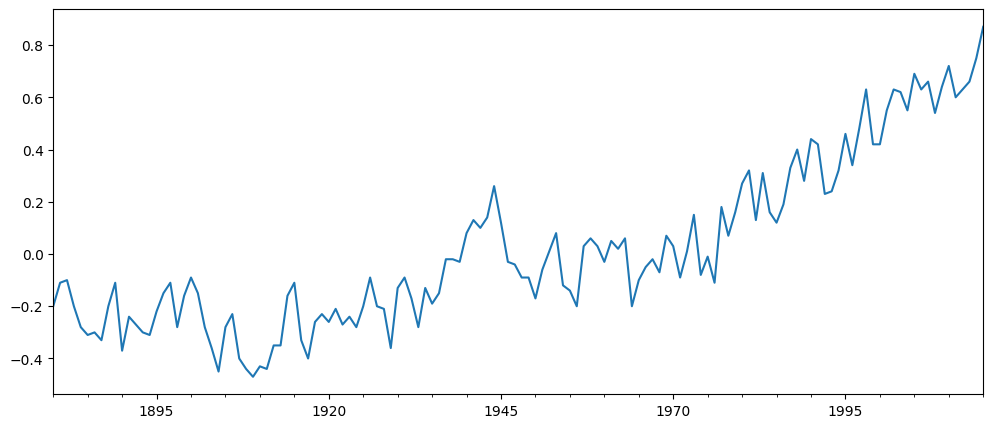

In [6]:
serie.plot();

In [7]:
# verificando a média móvel MMS - período 3 anos
media_movel1 = serie.rolling(window=3) # window = qual o período de referência, essa linha fixa o período
media_movel1 = media_movel1.mean() # essa linha tira a média

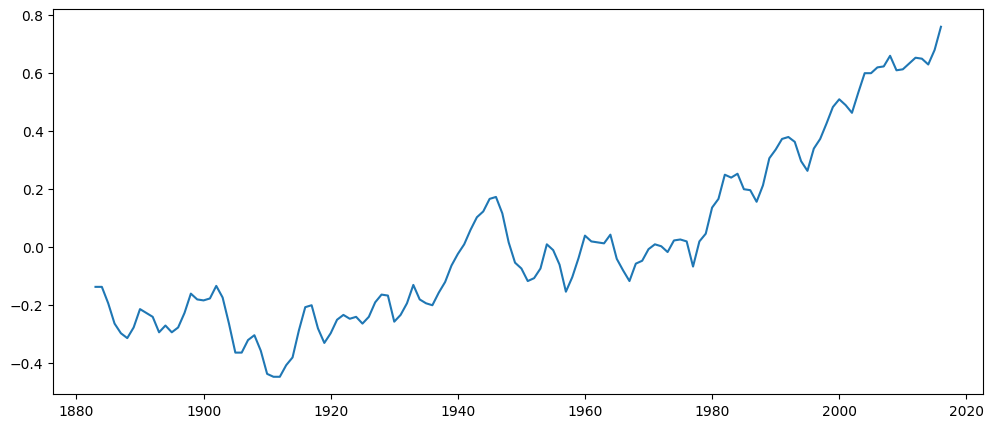

In [8]:
plt.plot(media_movel1);

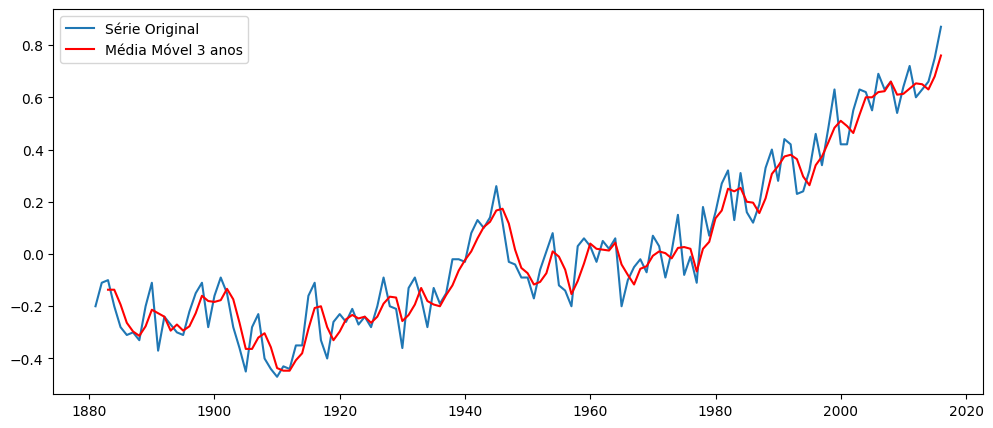

In [10]:
# comparando série original e série c média móvel MMS
plt.plot(serie, label='Série Original')
plt.plot(media_movel1,color='red', label='Média Móvel 3 anos')
plt.legend(loc='best') # matplotlib seleciona o local para legenda
plt.show()

In [11]:
# verificando a média móvel MMS - período 10 anos
## série mais suavizada com maior tempo e perde mais dados iniciais
## por um lado ganha a análise da tendência, porém perda significativa de dados iniciais
media_movel2 = serie.rolling(window=10) 
media_movel2 = media_movel2.mean()

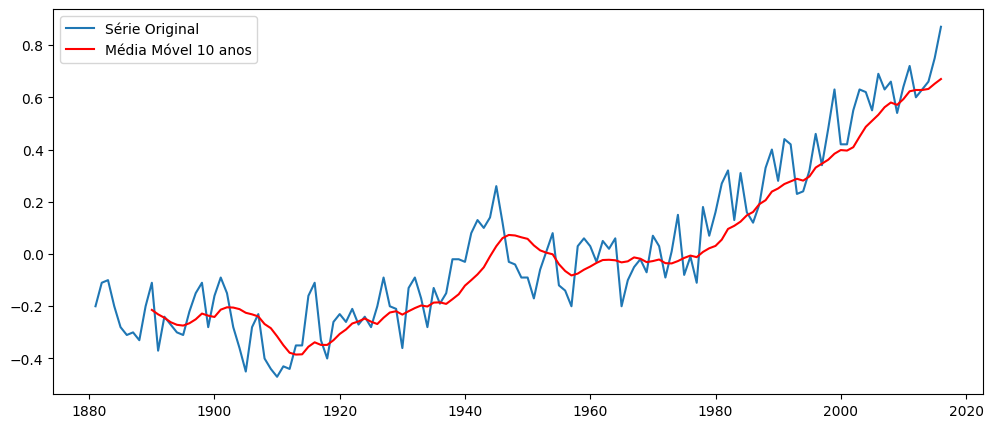

In [12]:
plt.plot(serie, label='Série Original')
plt.plot(media_movel2,color='red', label='Média Móvel 10 anos')
plt.legend(loc='best')
plt.show()

In [13]:
media_movel3 = serie.rolling(window=20)
media_movel3 = media_movel3.mean()

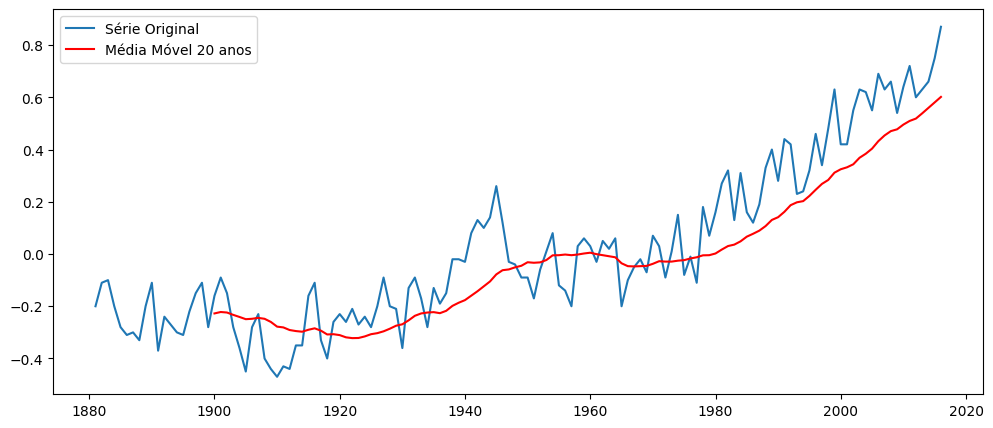

In [14]:
plt.plot(serie, label='Série Original')
plt.plot(media_movel3,color='red', label='Média Móvel 20 anos')
plt.legend(loc='best')
plt.show()

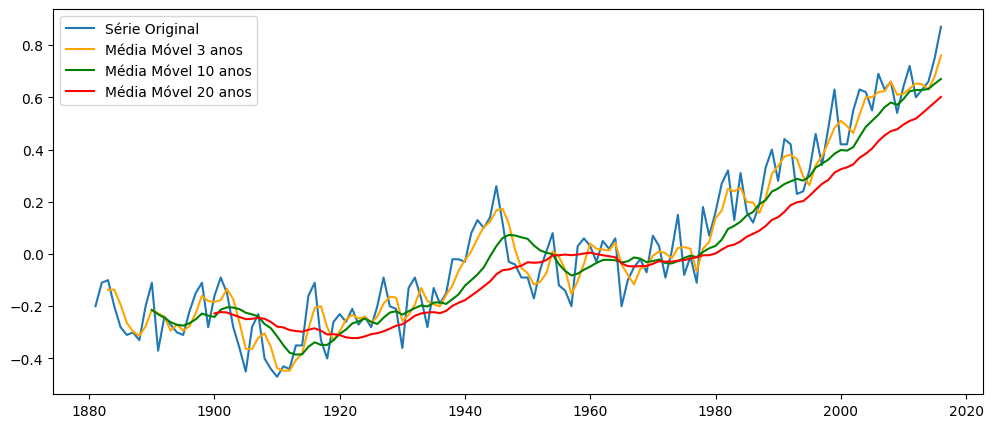

In [15]:
# comparando todas as médias móveis
plt.plot(serie, label='Série Original')
plt.plot(media_movel1,color='orange', label='Média Móvel 3 anos');
plt.plot(media_movel2,color='green', label='Média Móvel 10 anos');
plt.plot(media_movel3,color='red', label='Média Móvel 20 anos');
plt.legend(loc='best')
plt.show()

In [16]:
# média móvel centralizada
## perde dados do início e do fim
media_movel4 = serie.rolling(window=3,center=True)
media_movel4 = media_movel4.mean()

In [17]:
media_movel5 = serie.rolling(window=10,center=True)
media_movel5 = media_movel5.mean()

In [18]:
media_movel6 = serie.rolling(window=20,center=True)
media_movel6 = media_movel6.mean()

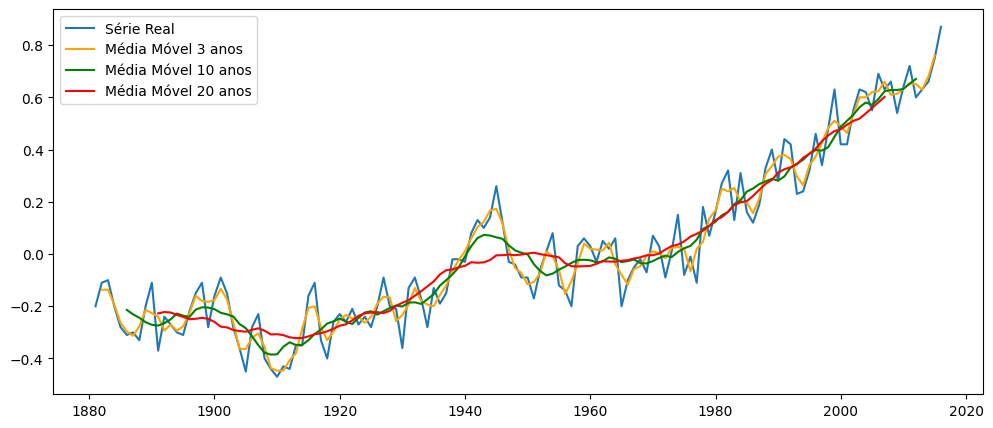

In [19]:
# tendência ficou melhor aqui na média móvel centralizada
plt.plot(serie, label='Série Real')
plt.plot(media_movel4,color='orange', label='Média Móvel 3 anos');
plt.plot(media_movel5,color='green', label='Média Móvel 10 anos');
plt.plot(media_movel6,color='red', label='Média Móvel 20 anos');
plt.legend(loc='best')
plt.show()